In [2]:
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import evaltools as et, places, viz_tools, visualisations
import pandas as pd
import xarray as xr
import datetime as dt
import os 
import glob 
import cmocean 

%matplotlib inline

1.1363636363636362

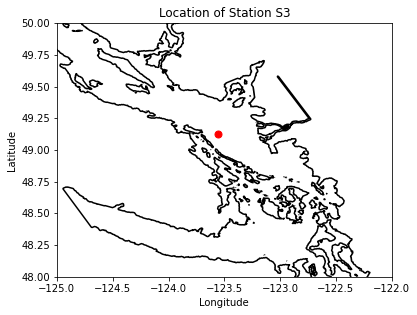

In [3]:
loc='S3'

# lat and lon informatin for place:
lon,lat=places.PLACES['S3']['lon lat']
# get place information on SalishSeaCast grid:
ij,ii=places.PLACES['S3']['NEMO grid ji']
# GEM2.5 grid ji is atm forcing grid for ops files
jw,iw=places.PLACES['S3']['GEM2.5 grid ji']

fig, ax = plt.subplots(1,1,figsize = (6,6))
with xr.open_dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc') as mesh:
    ax.contour(mesh.nav_lon,mesh.nav_lat,mesh.tmask.isel(t=0,z=0),[0.1,],colors='k')
    tmask=np.array(mesh.tmask)
    gdept_1d=np.array(mesh.gdept_1d)
    e3t_0=np.array(mesh.e3t_0)
ax.plot(lon, lat, '.', markersize=14, color='red')
ax.set_ylim(48,50)
ax.set_xlim(-125,-122)
ax.set_title('Location of Station S3')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
viz_tools.set_aspect(ax,coords='map')

In [10]:
start= dt.datetime(2007,3,1,1)
end=dt.datetime(2007,3,1,1) 
basedir='/results2/SalishSea/nowcast-green.201905/'
nam_fmt='nowcast'
flen=1 # files contain 1 day of data each
ftype= 'grid_W' # load bio files
tres=1 # 1: hourly resolution; 24: daily resolution 
flist=et.index_model_files(start,end,basedir,nam_fmt,flen,ftype,tres)

with xr.open_mfdataset(flist['paths']) as grid:
    eddy07=np.array(grid.vert_eddy_diff.isel(y=ij,x=ii))
    diss07=np.array(grid.dissipation.isel(y=ij,x=ii))
    depth=np.array(grid.depthw)

In [14]:
len(eddy07)

24

ValueError: x and y must have same first dimension, but have shapes (40,) and (24, 40)

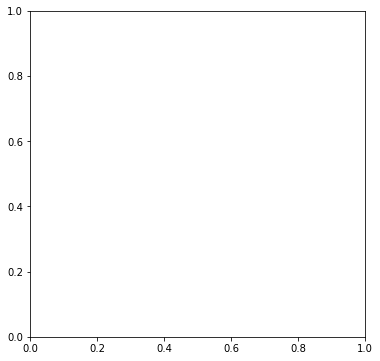

In [15]:
fig,ax=plt.subplots(1,1,figsize=(6,6))  # creates a figure "ax" with 2 plots, with the same y axis

ax.plot(depth,eddy07,'b-x',label='eddy')
# we want to mask the values were that equals zero (land)
# tmask[time, depth, y, x] theres only one time stamp, all values in depth, ij is y direction value, ii is x direction
# b-x makes a blue line connnected by dash with x at data points
#ax.plot(np.ma.masked_where(tmask[0,:,ij,ii]==0,f.variables['diatoms'][il,:,ij,ii]),f.variables['deptht'][:],'g-x',label='diatoms')
#ax[0].set_ylim(300,0)  # this reverses the y axis direction
#x[0].legend()
#ax[0].set_xlabel('Concentration ($\mu$M)')
#ax[0].set_ylabel('Depth (m)')
